# Homework 5. Pandas - Titanic

***Double Click here to edit this cell***

- Name: 김수연
- Student ID: 201800839
- Submission date: 2020 5/24 SUN

## IMPORTANT: 
- Do NOT use numpy or matplotlib functions. Use Pandas functions. 
- Remember we are praticing pandas!

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic_dataset.csv')

## Problem 1. Find mean fare that the first class passengers paid (In Korean current currency) (5 pts)
- Note that there are many unpaid free passengers. **Do NOT take unpaid free passengers into consideration.**
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1230 won per dollar.

In [3]:
# YOUR CODE HERE
data1 = titanic[(titanic.pclass == 1) & (titanic.fare > 0)]
fare = data1['fare']
mean_p = fare.sum() / len(fare)
mean_d = mean_p * 57.5
mean_w = mean_d * 1230
print("mean fare that the first class passengers paid = {:>.2f}".format(mean_w))

mean fare that the first class passengers paid = 6326173.16


```
mean fare that the first class passengers paid = 6326173.16
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [4]:
# YOUR CODE HERE
highfare = titanic['fare'].max()
highfare_svd = titanic[(titanic.survived == 1) & (titanic.fare == highfare)]
data2_1 = highfare_svd[['name', 'survived']]
print(data2_1)

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [5]:
# YOUR CODE HERE
lowfare = titanic['fare'].min()
lowfare_data = titanic[(titanic.fare == lowfare)]
data2_2 = lowfare_data[['name', 'pclass', 'survived']]
print(data2_2)

                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963     

```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [6]:
# YOUR CODE HERE
not_zerofare = titanic[titanic.fare > 0]
lowest = titanic[titanic.fare == not_zerofare['fare'].min()]
who_is_lowest = lowest[['name', 'pclass', 'survived']]
print(who_is_lowest)

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio who paid more than 0 and less than or equal to the mean fare of third class

In [7]:
# YOUR CODE HERE

third_fare = titanic[(titanic.pclass == 3) & (titanic.fare > 0)]
third_faremean = third_fare['fare'].sum() / len(third_fare)
data3_1 = titanic[(titanic.fare <= third_faremean) & (titanic.fare > 0)]
svd = data3_1[data3_1.survived == 1]
ratio = (len(svd) / len(data3_1)) * 100
print("survived ratio of low 1 group = {:>.2f}%".format(ratio))

survived ratio of low 1 group = 25.33%


```
survived ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio who paid more than the mean fare of first class

In [8]:
# YOUR CODE HERE

firstclass = titanic[titanic.pclass == 1]  # & (first_fare.fare > 0) # 여기에서는 fare = 0 인 것들도 포함해야 예시 답안과 일치함.
first_faremean = firstclass['fare'].sum() / len(firstclass)          # 따라서 1번의 mean_p(fare 평균(pound))와 차이가 생김.
data3_2 = titanic[titanic.fare > first_faremean]
rate = len(data3_2[data3_2.survived == 1]) / len(data3_2) * 100
print("survived ratio of high 1 group = {:>.2f}%".format(rate))

survived ratio of high 1 group = 72.16%


```
survived ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

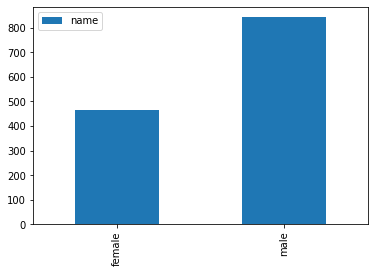

In [9]:
# YOUR CODE HERE
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

female = titanic[titanic.sex == 'female']
male = titanic[titanic.sex == 'male']
sex = ['female', 'male']

data4_1 = pd.DataFrame({'name' : [len(female), len(male)]},
                       index = sex)
data4_1.plot(kind = 'bar')
plt.legend(loc = 0)
plt.show()

<img src="hw5_1.png">

### 4.2 Plot mean age and mean fare by sex

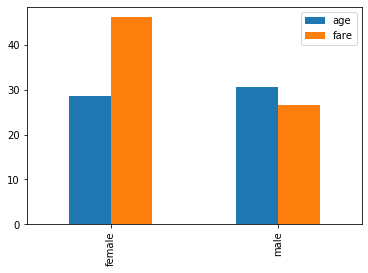

In [10]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

data4_2 = titanic[['age', 'fare', 'sex']]
data_f = data4_2[data4_2.sex == 'female']
data_m = data4_2[data4_2.sex == 'male']

data_f2 = data_f.notnull()
data_m2 = data_m.notnull()
age_f = data_f2[data_f2.age == True]
age_m = data_m2[data_m2.age == True]
agemean_f = data_f['age'].sum() / len(age_f)
agemean_m = data_m['age'].sum() / len(age_m)

faremean_f = data_f[data_f.fare > 0]['fare'].sum() / len(data_f[data_f.fare > 0])
faremean_m = data_m[data_m.fare > 0]['fare'].sum() / len(data_m[data_m.fare > 0])

plot4_2 = pd.DataFrame({'age': [agemean_f, agemean_m],
                        'fare' : [faremean_f, faremean_m]}, index = ['female', 'male'])
plot4_2.plot(kind = 'bar')

plt.legend(loc = 0)
plt.show()

<img src="hw5_2.png">

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [11]:
# YOUR CODE HERE
title = lambda x: x.partition('.')[0] + x.partition('.')[1]
title2 = lambda x: x.split()[-1]
titanic[['name']]
tmp = titanic['name']

tmp2 = tmp.apply(title)
title_data = tmp2.apply(title2).value_counts()
print(title_data)

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Don.           1
Countess.      1
Jonkheer.      1
Mme.           1
Sir.           1
Dona.          1
Capt.          1
Lady.          1
Name: name, dtype: int64


```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

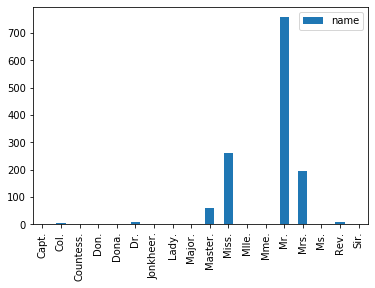

In [12]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

sorted_title = title_data.sort_index()
bar = pd.DataFrame(sorted_title)
bar.plot(kind = 'bar')
plt.show()

<img src="hw5_3.png">

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:
- Print probability in percent format and truncate all probability values to 2 decimal places

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [13]:
# YOUR CODE HERE
first_f = titanic[(titanic.sex == 'female') & (titanic.pclass == 1)]
con= 100 * len(first_f[first_f.survived == 1]) / len(first_f)
sup = 100* len(first_f[first_f.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=female, pclass=1) = ", round(con, 2))
print("Support: P(survived = 1, sex=female, pclass=1) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=female, pclass=1) =  96.53
Support: P(survived = 1, sex=female, pclass=1) =  10.62


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53
Support: P(survived = 1, sex=female, pclass=1) = 10.62
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [14]:
# YOUR CODE HERE
second_f = titanic[(titanic.sex == 'female') & (titanic.pclass == 2)]
con = 100 * len(second_f[second_f.survived == 1]) / len(second_f)
sup = 100* len(second_f[second_f.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=female, pclass=2) = ", round(con, 2))
print("Support: P(survived = 1, sex=female, pclass=2) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=female, pclass=2) =  88.68
Support: P(survived = 1, sex=female, pclass=2) =  7.18


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68
Support: P(survived = 1, sex=female, pclass=2) = 7.18
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [15]:
# YOUR CODE HERE
third_f = titanic[(titanic.sex == 'female') & (titanic.pclass == 3)]
con = 100 * len(third_f[third_f.survived == 1]) / len(third_f)
sup = 100* len(third_f[third_f.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=female, pclass=3) = ", round(con, 2))
print("Support: P(survived = 1, sex=female, pclass=3) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=female, pclass=3) =  49.07
Support: P(survived = 1, sex=female, pclass=3) =  8.1


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07
Support: P(survived = 1, sex=female, pclass=3) = 8.10
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [16]:
# YOUR CODE HERE
first_m = titanic[(titanic.sex == 'male') & (titanic.pclass == 1)]
con= 100 * len(first_m[first_m.survived == 1]) / len(first_m)
sup = 100* len(first_m[first_m.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=male, pclass=1) = ", round(con, 2))
print("Support: P(survived = 1, sex=male, pclass=1) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=male, pclass=1) =  34.08
Support: P(survived = 1, sex=male, pclass=1) =  4.66


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08
Support: P(survived = 1, sex=male, pclass=1) = 4.66
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [17]:
# YOUR CODE HERE
second_m = titanic[(titanic.sex == 'male') & (titanic.pclass == 2)]
con = 100 * len(second_m[second_m.survived == 1]) / len(second_m)
sup = 100* len(second_m[second_m.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=male, pclass=2) = ", round(con, 2))
print("Support: P(survived = 1, sex=male, pclass=2) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=male, pclass=2) =  14.62
Support: P(survived = 1, sex=male, pclass=2) =  1.91


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62
Support: P(survived = 1, sex=male, pclass=2) = 1.91
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [18]:
# YOUR CODE HERE
third_m = titanic[(titanic.sex == 'male') & (titanic.pclass == 3)]
con = 100 * len(third_m[third_m.survived == 1]) / len(third_m)
sup = 100* len(third_m[third_m.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | sex=male, pclass=3) = ", round(con, 2))
print("Support: P(survived = 1, sex=male, pclass=3) = ", round(sup, 2))

Confidence: P(survived = 1 | sex=male, pclass=3) =  15.21
Support: P(survived = 1, sex=male, pclass=3) =  5.73


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21
Support: P(survived = 1, sex=male, pclass=3) = 5.73
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1, age <= 10, pclass=1)

In [19]:
# YOUR CODE HERE
first_under11 = titanic[(titanic.age <= 10) & (titanic.pclass == 1)]
con= 100 * len(first_under11[first_under11.survived == 1]) / len(first_under11)
sup = 100* len(first_under11[first_under11.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | age <= 10, pclass=1) = {:>.2f}".format(con))
print("Support: P(survived = 1, age <= 10, pclass=1) = ", round(sup, 2))

Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) =  0.23


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) = 0.23
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1, age <= 10, pclass=2)

In [20]:
# YOUR CODE HERE
second_under11 = titanic[(titanic.age <= 10) & (titanic.pclass == 2)]
con= 100 * len(second_under11[second_under11.survived == 1]) / len(second_under11)
sup = 100* len(second_under11[second_under11.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | age <= 10, pclass=2) = {:>.2f}".format(con))
print("Support: P(survived = 1, age <= 10, pclass=2) = {:>.2f}".format(sup))

Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1, age <= 10, pclass=3)

In [21]:
# YOUR CODE HERE
third_under11 = titanic[(titanic.age <= 10) & (titanic.pclass == 3)]
con= 100 * len(third_under11[third_under11.survived == 1]) / len(third_under11)
sup = 100* len(third_under11[third_under11.survived == 1]) / len(titanic)
print("Confidence: P(survived = 1 | age <= 10, pclass=3) = {:>.2f}".format(con))
print("Support: P(survived = 1, age <= 10, pclass=3) = {:>.2f}".format(sup))

Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

각 Case에서 Confidence만 보면, 특정 경우에 대한 비율을 알아보기는 편하지만 그것이 전체에서 어떤 의미를 지니는지는 알 수 없다. 그 예로, 6.8번 문제에서 10살 이하의 2등석 손님 중에서의(confidence) 생존률은 100퍼센트이지만, 그 인원이 전체 승객에 대해서(support)는 1.68퍼센트로, 10살 이하의 3등석 손님의 전체에 대한(support) 생존률 1.91퍼센트보다도 낮다는 것을 알 수 있다. 어떤 자료에서 confidence만 확인하면 전체 자료를 잘못 해석할 가능성이 있음을 기억하자. 반대로 support만 확인해도 전체 자료에 대해 오역할 수 있다.

## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

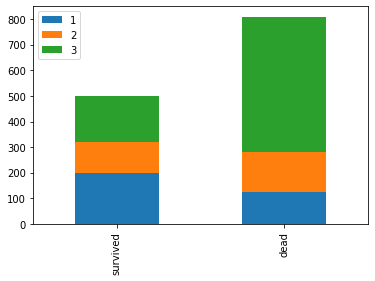

In [22]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

svd = titanic[titanic.survived == 1]
dead = titanic[titanic.survived == 0]
x = ['survived', 'dead']
y_1 = [len(svd[svd.pclass == 1]), len(dead[dead.pclass == 1])]
y_2 = [len(svd[svd.pclass == 2]), len(dead[dead.pclass == 2])]
y_3 = [len(svd[svd.pclass == 3]), len(dead[dead.pclass == 3])]
bar = pd.DataFrame({'1' : y_1,
                    '2' : y_2,
                    '3' : y_3},
                        index = x)

bar.plot(kind = 'bar', stacked=True)

plt.show()

<img src="hw5_4.png">

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

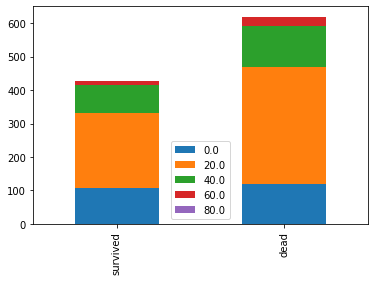

In [23]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

x = ['survived', 'dead']
range0 = titanic[(titanic.age < 20) & (titanic.age >= 0)]
range20 = titanic[(titanic.age < 40) & (titanic.age >= 20)]
range40 = titanic[(titanic.age < 60) & (titanic.age >= 40)]
range60 = titanic[(titanic.age < 80) & (titanic.age >= 60)]
range80 = titanic[(titanic.age >= 80)]
bar = pd.DataFrame({'0.0' : [len(range0[range0.survived == 1]), len(range0[range0.survived == 0])],
                    '20.0' : [len(range20[range20.survived == 1]), len(range20[range20.survived == 0])],
                    '40.0' : [len(range40[range40.survived == 1]), len(range40[range40.survived == 0])],
                    '60.0' : [len(range60[range60.survived == 1]), len(range60[range60.survived == 0])],
                    '80.0' : [len(range80[range80.survived == 1]), len(range80[range80.survived == 0])]},
                      index = x)
bar.plot(kind = 'bar', stacked=True)

plt.show()

<img src="hw5_5.png">

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

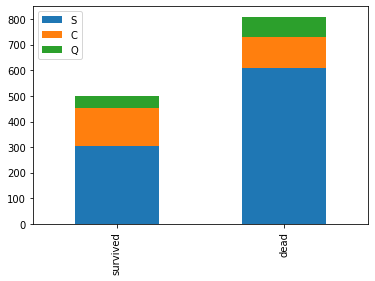

In [24]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt

svd = titanic[titanic.survived == 1]
dead = titanic[titanic.survived == 0]
x = ['survived', 'dead']
svd_data = svd.embarked.value_counts().sort_index()
dead_data = dead.embarked.value_counts().sort_index()

bar = pd.DataFrame({'S': [svd_data[2], dead_data[2]],
                    'C': [svd_data[0], dead_data[0]],
                    'Q': [svd_data[1], dead_data[1]]}, index = x)
bar.plot(kind = 'bar', stacked = True)
plt.show()

<img src="hw5_6.png">

### 7.4 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

각 문제에서 생존자만 확인했을 때는, 1등석 승객, 20대, embarked port가 Southampton인 승객이 가장 많이 살아남은 것처럼 보인다. 하지만 사망자을 확인해보면, 20대의 사망자 수가 가장 높고, embarked port가 Southampton인 승객이 가장 많이 사망했다는 것을 알 수 있다. 그리고 문제 7.1에서는, 생존한 승객 중에서 3등석 승객이 2등석 승객보다 많은 수치를 보이지만, 사망한 승객은 3등석 승객이 압도적으로 많다. 해당 자료의 크기가 다르기 때문에, 그것이 얼마냐에 따라서 이렇게 자료가 오역될 수도 있는 것이다.


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted